<a href="https://colab.research.google.com/github/SergioMoraa/ProyectoFinalTAM/blob/main/proyecto_final_pdi.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

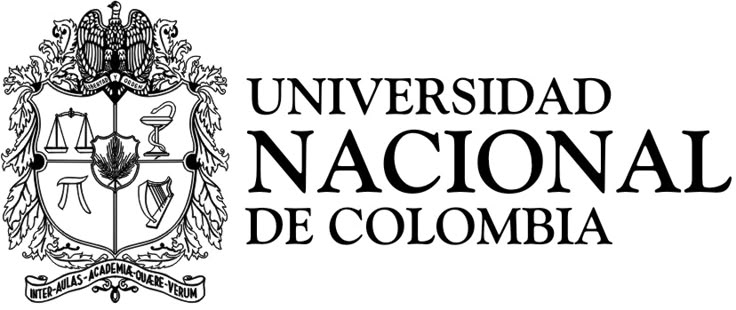
#Presentacion del Codigo Proyecto Final TAM
#Universidad Nacional de Colombia Sede Manizales
###Facultada Ingen√≠eria y Arquitectura - Ingen√≠eria Electr√≥nica
Estudiante: Sergio Andr√©s Mora Orrego - Mateo Duque Gaviria - Juan esteban Villada Sierra

In [ ]:
%%capture
!pip install ultralytics roboflow

## Instalaci√≥n de dependencias

En esta celda instalamos los paquetes necesarios para el proyecto:
- `ultralytics`: Para usar modelos YOLO (You Only Look Once) para detecci√≥n de objetos
- `roboflow`: Para descargar y gestionar datasets de visi√≥n por computadora

El comando `%%capture` evita que se muestre el output detallado de la instalaci√≥n.

In [ ]:
!python -V
!pip list | grep torch
!pip list | grep ultralytics

Python 3.11.13
pytorch-ignite                        0.5.2
pytorch-lightning                     2.5.2
torch                                 2.6.0+cu124
torchao                               0.10.0
torchaudio                            2.6.0+cu124
torchdata                             0.11.0
torchinfo                             1.8.0
torchmetrics                          1.7.3
torchsummary                          1.5.1
torchtune                             0.6.1
torchvision                           0.21.0+cu124
ultralytics                           8.3.169
ultralytics-thop                      2.0.14


## Verificaci√≥n de versiones

Verificamos:
1. La versi√≥n de Python con `python -V`
2. Las versiones instaladas de PyTorch y sus paquetes relacionados
3. La versi√≥n de ultralytics

Esto es importante para garantizar compatibilidad entre paquetes.

In [ ]:
# -*- coding: utf-8 -*-
# Importaci√≥n de bibliotecas necesarias
import os
import yaml
import gdown
import wandb
import shutil
import requests
import ipywidgets as widgets
import cv2
import numpy as np
from pathlib import Path
from ultralytics import YOLO
from roboflow import Roboflow
from IPython.display import display, Image, clear_output
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import torch
import torchvision
import torch.nn as nn
from torchvision.io import ImageReadMode
import torchvision.transforms.functional as TF

# Deshabilitar Weights & Biases para evitar registros innecesarios
os.environ['WANDB_DISABLED'] = 'true'

Creating new Ultralytics Settings v0.0.6 file ‚úÖ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.


## Importaci√≥n de bibliotecas

Importamos todas las bibliotecas necesarias para el proyecto:

1. **Manipulaci√≥n de datos y sistema**:
   - `os`, `shutil`, `pathlib`: Para manejo de archivos y directorios
   - `yaml`: Para trabajar con archivos de configuraci√≥n YAML

2. **Visualizaci√≥n**:
   - `matplotlib`, `IPython.display`: Para mostrar im√°genes y gr√°ficos
   - `ipywidgets`: Para crear elementos interactivos

3. **Deep Learning y Visi√≥n por Computadora**:
   - `torch`, `torchvision`: PyTorch y sus herramientas para visi√≥n
   - `ultralytics`: Implementaci√≥n de YOLO
   - `cv2` (OpenCV): Procesamiento de im√°genes

4. **Gesti√≥n de datasets**:
   - `roboflow`: Para descargar datasets
   - `gdown`: Para descargar archivos de Google Drive

5. **Configuraci√≥n adicional**:
   - Deshabilitamos Weights & Biases (`wandb`) para evitar logs no deseados

In [ ]:

rf = Roboflow(api_key="CgQKRcjD3uXFQfu0qt1e")
project = rf.workspace("pdi-sp8rw").project("face-id-zw8mi")
version = project.version(2)
dataset = version.download("yolov5")
print(f"Dataset de Roboflow descargado en: {dataset.location}")

loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to Face-ID-2 in yolov5pytorch:: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 4502/4502 [00:00<00:00, 7022.31it/s]

Dataset de Roboflow descargado en: /kaggle/working/Face-ID-2


## Descarga del Dataset

1. **Autenticaci√≥n con Roboflow**:
   - Usamos una API key para acceder al servicio de Roboflow
   
2. **Acceso al proyecto espec√≠fico**:
   - Accedemos al workspace "pdi-sp8rw" y proyecto "face-id-zw8mi"
   - Seleccionamos la versi√≥n 1 del dataset

3. **Descarga del dataset**:
   - Descargamos el dataset en formato YOLOv5
   - Mostramos la ubicaci√≥n donde se guard√≥ el dataset

Este dataset contiene im√°genes etiquetadas para entrenar nuestro modelo de reconocimiento facial.

In [ ]:
data_config = {
    'path': '/kaggle/working/Face-ID-2',  # Ruta DIRECTA al folder del dataset
    'train': 'train/images',  # Sin prefijos adicionales
    'val': 'valid/images',    # Sin prefijos adicionales
    'test': 'test/images',    # Sin prefijos adicionales
    'names': {0: 'Acceso denegado', 1: 'Acceso permitido'},
    'nc': 2  # N√∫mero de clases (CR√çTICO)
}

yaml_path = '/kaggle/working/Face-ID-2/data_config.yaml'  # Guarda dentro del dataset
with open(yaml_path, 'w') as yaml_file:
    yaml.dump(data_config, yaml_file, default_flow_style=False)

## Configuraci√≥n del Dataset

Creamos un archivo YAML de configuraci√≥n que contiene:

1. **Estructura del dataset**:
   - Rutas a los directorios de entrenamiento, validaci√≥n y prueba
   - La ruta base donde se encuentra el dataset

2. **Configuraci√≥n de clases**:
   - `names`: Mapeo de clases (0: "Acceso denegado", 1: "Acceso permitido")
   - `nc`: N√∫mero de clases (2 en este caso)

Este archivo es esencial para que YOLO entienda la estructura de nuestro dataset.

In [ ]:
# Verifica que las rutas son correctas
import os
print("¬øExiste train?", os.path.exists('/kaggle/working/Face-ID-2/train/images'))
print("¬øExiste valid?", os.path.exists('/kaggle/working/Face-ID-2/valid/images'))
print("¬øExiste test?", os.path.exists('/kaggle/working/Face-ID-2/test/images'))

¬øExiste train? True
¬øExiste valid? True
¬øExiste test? True


## Verificaci√≥n de rutas

Antes de entrenar, verificamos que:
1. El directorio de entrenamiento existe
2. El directorio de validaci√≥n existe
3. El directorio de prueba existe

Esta validaci√≥n previene errores durante el entrenamiento por rutas incorrectas.

In [ ]:
model = YOLO('yolov10s.pt')
results = model.train(
    data='/kaggle/working/Face-ID-2/data_config.yaml',  # Ruta ABSOLUTA al YAML
    epochs=90,
    imgsz=640,
    device=[0, 1]
)

Ultralytics 8.3.169 üöÄ Python-3.11.13 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
                                                        CUDA:1 (Tesla T4, 15095MiB)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=16, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=/kaggle/working/Face-ID-2/data_config.yaml, degrees=0.0, deterministic=True, device=0,1, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=90, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=640, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.01, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=yolov10s.pt, momentum=0.937, mosaic=1.0, multi_scale=False, name=train2, nbs=64, nms=False, opset=None, optimize=Fals

train: Scanning /kaggle/working/Face-ID-2/train/labels.cache... 1968 images, 0 backgrounds, 0 corrupt: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 1968/1968 [00:00<?, ?it/s]


albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, method='weighted_average', num_output_channels=3), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))
val: Fast image access ‚úÖ (ping: 0.0¬±0.0 ms, read: 690.2¬±456.0 MB/s, size: 50.9 KB)


val: Scanning /kaggle/working/Face-ID-2/valid/labels.cache... 185 images, 0 backgrounds, 0 corrupt: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 185/185 [00:00<?, ?it/s]


Plotting labels to runs/detect/train2/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.001667, momentum=0.9) with parameter groups 99 weight(decay=0.0), 112 weight(decay=0.0005), 111 bias(decay=0.0)
Image sizes 640 train, 640 val
Using 4 dataloader workers
Logging results to runs/detect/train2
Starting training for 90 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/90      2.56G      2.829      8.124      3.047         22        640: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 123/123 [00:32<00:00,  3.81it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 12/12 [00:01<00:00,  6.25it/s]


                   all        185        287      0.155      0.421      0.226      0.153

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/90      2.99G       3.11      3.575      3.142         14        640: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 123/123 [00:29<00:00,  4.20it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 12/12 [00:01<00:00,  6.74it/s]


                   all        185        287     0.0556       0.14    0.00872    0.00312

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/90      3.03G      3.139      3.419      3.124         18        640: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 123/123 [00:28<00:00,  4.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 12/12 [00:01<00:00,  6.87it/s]


                   all        185        287      0.105      0.161     0.0693     0.0256

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/90      3.08G      3.075      3.268      3.072         13        640: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 123/123 [00:28<00:00,  4.30it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 12/12 [00:01<00:00,  6.70it/s]


                   all        185        287       0.37      0.397      0.376      0.247

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/90      3.12G      3.015      3.177      3.016         22        640: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 123/123 [00:28<00:00,  4.28it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 12/12 [00:01<00:00,  6.53it/s]


                   all        185        287       0.71      0.573      0.642       0.44

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/90      3.12G      2.844      2.846      2.891         22        640: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 123/123 [00:28<00:00,  4.28it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 12/12 [00:01<00:00,  6.67it/s]


                   all        185        287      0.786      0.635      0.757      0.528

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/90      3.17G      2.779      2.693      2.841         25        640: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 123/123 [00:28<00:00,  4.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 12/12 [00:01<00:00,  6.66it/s]


                   all        185        287      0.808      0.631      0.744      0.521

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/90      3.17G      2.785      2.594      2.825         21        640: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 123/123 [00:28<00:00,  4.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 12/12 [00:01<00:00,  6.72it/s]


                   all        185        287      0.801      0.685       0.78      0.549

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/90      3.17G      2.679      2.446      2.774         19        640: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 123/123 [00:28<00:00,  4.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 12/12 [00:01<00:00,  6.63it/s]


                   all        185        287      0.756       0.73      0.796      0.547

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/90      3.17G      2.598      2.407      2.737         25        640: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 123/123 [00:29<00:00,  4.24it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 12/12 [00:01<00:00,  6.75it/s]


                   all        185        287      0.834      0.756      0.837      0.599

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/90      3.17G      2.638      2.379      2.759         50        640: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 123/123 [00:28<00:00,  4.30it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 12/12 [00:01<00:00,  6.76it/s]


                   all        185        287      0.878      0.724      0.843      0.604

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/90      3.17G      2.538      2.177      2.654         13        640: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 123/123 [00:28<00:00,  4.28it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 12/12 [00:01<00:00,  6.55it/s]


                   all        185        287       0.82      0.706      0.804      0.572

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/90      3.17G      2.537      2.172      2.682         27        640: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 123/123 [00:28<00:00,  4.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 12/12 [00:01<00:00,  6.69it/s]


                   all        185        287       0.87      0.716      0.811      0.576

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/90      3.17G      2.505      2.097      2.659         18        640: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 123/123 [00:29<00:00,  4.23it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 12/12 [00:01<00:00,  6.83it/s]


                   all        185        287      0.847      0.749      0.818      0.585

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/90      3.17G      2.455       1.99      2.607         19        640: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 123/123 [00:29<00:00,  4.23it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 12/12 [00:01<00:00,  6.69it/s]


                   all        185        287      0.798      0.702      0.798      0.577

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      16/90      3.17G      2.467      1.957      2.611         21        640: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 123/123 [00:28<00:00,  4.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 12/12 [00:01<00:00,  6.70it/s]


                   all        185        287      0.859      0.752      0.838      0.607

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      17/90      3.17G      2.408      2.029      2.584         20        640: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 123/123 [00:28<00:00,  4.25it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 12/12 [00:01<00:00,  6.69it/s]


                   all        185        287      0.864      0.713      0.811      0.611

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      18/90      3.17G      2.435       1.94      2.585         20        640: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 123/123 [00:28<00:00,  4.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 12/12 [00:01<00:00,  6.72it/s]


                   all        185        287      0.885      0.782      0.871      0.637

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      19/90      3.17G      2.369      1.852      2.566         21        640: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 123/123 [00:29<00:00,  4.23it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 12/12 [00:01<00:00,  6.76it/s]


                   all        185        287      0.847      0.781      0.858      0.637

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      20/90      3.17G      2.268      1.741      2.525         22        640: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 123/123 [00:28<00:00,  4.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 12/12 [00:01<00:00,  6.72it/s]


                   all        185        287      0.886      0.789      0.885      0.637

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      21/90      3.17G      2.378      1.793      2.554         22        640: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 123/123 [00:28<00:00,  4.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 12/12 [00:01<00:00,  6.74it/s]


                   all        185        287      0.826      0.826      0.861      0.608

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      22/90      3.17G       2.29       1.75      2.525         10        640: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 123/123 [00:28<00:00,  4.28it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 12/12 [00:01<00:00,  6.75it/s]


                   all        185        287      0.894      0.774      0.859      0.634

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      23/90      3.17G      2.294      1.802      2.522         18        640: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 123/123 [00:28<00:00,  4.30it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 12/12 [00:01<00:00,  6.60it/s]


                   all        185        287      0.893      0.813      0.885      0.657

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      24/90      3.17G       2.26      1.682      2.485         17        640: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 123/123 [00:28<00:00,  4.33it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 12/12 [00:01<00:00,  6.45it/s]


                   all        185        287      0.875      0.805      0.879      0.647

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      25/90      3.17G      2.299      1.686      2.496         19        640: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 123/123 [00:28<00:00,  4.31it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 12/12 [00:01<00:00,  6.52it/s]


                   all        185        287      0.887      0.829      0.895      0.671

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      26/90      3.17G      2.286      1.635      2.511         28        640: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 123/123 [00:28<00:00,  4.34it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 12/12 [00:01<00:00,  6.73it/s]


                   all        185        287      0.851      0.805      0.875      0.645

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      27/90      3.17G      2.197      1.608      2.445         14        640: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 123/123 [00:28<00:00,  4.28it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 12/12 [00:01<00:00,  6.78it/s]


                   all        185        287      0.909      0.747      0.868      0.632

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      28/90      3.17G      2.334      1.716      2.506         32        640: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 123/123 [00:28<00:00,  4.28it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 12/12 [00:01<00:00,  6.83it/s]


                   all        185        287      0.841      0.768      0.837      0.627

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      29/90      3.17G      2.276      1.632      2.464         19        640: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 123/123 [00:28<00:00,  4.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 12/12 [00:01<00:00,  6.69it/s]


                   all        185        287      0.866      0.846      0.896      0.658

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      30/90      3.17G      2.136      1.561      2.434         25        640: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 123/123 [00:28<00:00,  4.28it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 12/12 [00:01<00:00,  6.68it/s]


                   all        185        287      0.916      0.795      0.887      0.671

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      31/90      3.17G      2.131      1.508      2.438         17        640: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 123/123 [00:28<00:00,  4.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 12/12 [00:01<00:00,  6.81it/s]


                   all        185        287      0.904      0.781      0.882       0.65

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      32/90      3.17G       2.13      1.457      2.402         19        640: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 123/123 [00:28<00:00,  4.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 12/12 [00:01<00:00,  6.83it/s]


                   all        185        287      0.891      0.834      0.889      0.665

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      33/90      3.17G      2.185        1.5       2.43         22        640: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 123/123 [00:28<00:00,  4.25it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 12/12 [00:01<00:00,  6.84it/s]


                   all        185        287      0.806      0.852      0.876      0.654

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      34/90      3.17G      2.097      1.483      2.413         20        640: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 123/123 [00:29<00:00,  4.24it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 12/12 [00:01<00:00,  6.54it/s]


                   all        185        287      0.905      0.804      0.877      0.654

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      35/90      3.17G      2.095      1.384      2.398         30        640: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 123/123 [00:28<00:00,  4.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 12/12 [00:01<00:00,  6.70it/s]


                   all        185        287      0.937      0.799      0.908      0.684

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      36/90      3.17G      2.111      1.414      2.402         23        640: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 123/123 [00:28<00:00,  4.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 12/12 [00:01<00:00,  6.77it/s]


                   all        185        287      0.918      0.861      0.904      0.676

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      37/90      3.17G      2.125      1.487      2.402         28        640: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 123/123 [00:28<00:00,  4.25it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 12/12 [00:01<00:00,  6.73it/s]


                   all        185        287      0.901      0.841      0.903      0.664

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      38/90      3.17G      2.081      1.448      2.379         18        640: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 123/123 [00:28<00:00,  4.25it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 12/12 [00:01<00:00,  6.81it/s]


                   all        185        287      0.899      0.839      0.903      0.679

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      39/90      3.17G      2.029      1.353      2.372         18        640: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 123/123 [00:29<00:00,  4.23it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 12/12 [00:01<00:00,  6.84it/s]


                   all        185        287      0.914      0.858      0.907      0.693

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      40/90      3.17G      2.079       1.36      2.378         24        640: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 123/123 [00:28<00:00,  4.29it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 12/12 [00:01<00:00,  6.79it/s]


                   all        185        287      0.881      0.841      0.887      0.668

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      41/90      3.17G      2.039      1.355      2.368         19        640: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 123/123 [00:28<00:00,  4.28it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 12/12 [00:01<00:00,  6.81it/s]


                   all        185        287       0.88      0.843      0.905      0.676

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      42/90      3.17G      1.975       1.28      2.348         19        640: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 123/123 [00:28<00:00,  4.29it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 12/12 [00:01<00:00,  6.75it/s]


                   all        185        287      0.916       0.85      0.912      0.679

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      43/90      3.17G      1.999      1.338      2.372         14        640: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 123/123 [00:28<00:00,  4.29it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 12/12 [00:01<00:00,  6.77it/s]


                   all        185        287      0.922      0.823      0.897      0.669

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      44/90      3.17G      2.019      1.295      2.376         13        640: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 123/123 [00:29<00:00,  4.22it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 12/12 [00:01<00:00,  6.80it/s]


                   all        185        287      0.923      0.829      0.896      0.689

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      45/90      3.17G      1.973      1.281      2.318         17        640: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 123/123 [00:28<00:00,  4.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 12/12 [00:01<00:00,  6.86it/s]


                   all        185        287      0.923      0.839      0.902      0.688

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      46/90      3.17G      1.939      1.268      2.333         20        640: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 123/123 [00:28<00:00,  4.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 12/12 [00:01<00:00,  6.75it/s]


                   all        185        287      0.919      0.836      0.903      0.686

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      47/90      3.17G       1.93      1.283      2.303         19        640: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 123/123 [00:28<00:00,  4.30it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 12/12 [00:01<00:00,  6.77it/s]


                   all        185        287      0.924      0.837      0.914      0.688

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      48/90      3.17G      1.984      1.287      2.329         33        640: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 123/123 [00:28<00:00,  4.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 12/12 [00:01<00:00,  6.72it/s]


                   all        185        287      0.932      0.837      0.903      0.682

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      49/90      3.17G      1.884      1.189       2.27         22        640: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 123/123 [00:28<00:00,  4.35it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 12/12 [00:01<00:00,  6.79it/s]


                   all        185        287      0.921      0.842      0.901      0.681

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      50/90      3.17G      1.982      1.259      2.335         14        640: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 123/123 [00:28<00:00,  4.28it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 12/12 [00:01<00:00,  6.82it/s]


                   all        185        287      0.923      0.821      0.882      0.673

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      51/90      3.17G      1.915      1.193      2.271         41        640: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 123/123 [00:28<00:00,  4.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 12/12 [00:01<00:00,  6.86it/s]


                   all        185        287      0.901      0.857      0.893      0.683

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      52/90      3.17G      1.898      1.207      2.311         38        640: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 123/123 [00:28<00:00,  4.36it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 12/12 [00:01<00:00,  6.86it/s]


                   all        185        287      0.921      0.834      0.899      0.684

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      53/90      3.17G      1.897      1.209      2.297         26        640: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 123/123 [00:28<00:00,  4.37it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 12/12 [00:01<00:00,  6.87it/s]


                   all        185        287      0.923       0.87      0.919      0.688

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      54/90      3.17G      1.817      1.127      2.257         12        640: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 123/123 [00:28<00:00,  4.31it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 12/12 [00:01<00:00,  6.93it/s]


                   all        185        287      0.926      0.852      0.909      0.687

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      55/90      3.17G      1.855      1.125      2.277         25        640: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 123/123 [00:28<00:00,  4.35it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 12/12 [00:01<00:00,  6.81it/s]


                   all        185        287      0.922      0.841      0.909      0.691

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      56/90      3.17G      1.758      1.054      2.232         14        640: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 123/123 [00:28<00:00,  4.33it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 12/12 [00:01<00:00,  6.75it/s]


                   all        185        287      0.916      0.863      0.915      0.691

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      57/90      3.17G       1.82      1.102      2.219         21        640: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 123/123 [00:28<00:00,  4.29it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 12/12 [00:01<00:00,  6.79it/s]


                   all        185        287      0.887      0.879      0.915      0.698

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      58/90      3.17G      1.792      1.077      2.251         20        640: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 123/123 [00:28<00:00,  4.36it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 12/12 [00:01<00:00,  6.74it/s]


                   all        185        287      0.925      0.848      0.912      0.696

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      59/90      3.17G      1.865      1.136      2.263         26        640: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 123/123 [00:28<00:00,  4.28it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 12/12 [00:01<00:00,  6.71it/s]


                   all        185        287      0.892      0.873       0.91      0.693

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      60/90      3.17G      1.744      1.055      2.223         20        640: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 123/123 [00:28<00:00,  4.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 12/12 [00:01<00:00,  6.75it/s]


                   all        185        287      0.894      0.862      0.905      0.695

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      61/90      3.17G      1.729      1.027      2.214         20        640: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 123/123 [00:28<00:00,  4.24it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 12/12 [00:01<00:00,  6.81it/s]


                   all        185        287      0.927      0.862      0.911      0.691

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      62/90      3.17G      1.753      1.071      2.211         14        640: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 123/123 [00:28<00:00,  4.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 12/12 [00:01<00:00,  6.83it/s]


                   all        185        287      0.888      0.876       0.91      0.692

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      63/90      3.17G       1.75      1.025      2.214         23        640: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 123/123 [00:28<00:00,  4.30it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 12/12 [00:01<00:00,  6.86it/s]


                   all        185        287      0.931      0.848      0.909      0.689

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      64/90      3.17G      1.655      1.005      2.167         15        640: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 123/123 [00:28<00:00,  4.29it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 12/12 [00:01<00:00,  6.81it/s]


                   all        185        287      0.914      0.855      0.899      0.691

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      65/90      3.17G      1.669     0.9858      2.158         25        640: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 123/123 [00:28<00:00,  4.28it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 12/12 [00:01<00:00,  6.82it/s]


                   all        185        287      0.888      0.883      0.911      0.695

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      66/90      3.17G      1.671     0.9813       2.16         11        640: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 123/123 [00:28<00:00,  4.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 12/12 [00:01<00:00,  6.91it/s]


                   all        185        287      0.942       0.87      0.925      0.706

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      67/90      3.17G      1.738     0.9914      2.215         19        640: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 123/123 [00:29<00:00,  4.24it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 12/12 [00:01<00:00,  6.88it/s]


                   all        185        287       0.91      0.891      0.917        0.7

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      68/90      3.17G      1.694      1.008      2.194         29        640: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 123/123 [00:28<00:00,  4.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 12/12 [00:01<00:00,  6.79it/s]


                   all        185        287      0.944      0.873       0.92      0.702

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      69/90      3.17G      1.677     0.9802      2.159         27        640: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 123/123 [00:28<00:00,  4.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 12/12 [00:01<00:00,  6.94it/s]


                   all        185        287      0.929      0.847      0.913      0.698

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      70/90      3.17G      1.706      1.023      2.173         28        640: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 123/123 [00:28<00:00,  4.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 12/12 [00:01<00:00,  6.88it/s]


                   all        185        287      0.905      0.866      0.905      0.693

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      71/90      3.17G      1.706     0.9619      2.171         23        640: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 123/123 [00:28<00:00,  4.30it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 12/12 [00:01<00:00,  6.86it/s]


                   all        185        287      0.936      0.862      0.918      0.708

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      72/90      3.17G      1.615     0.9352      2.156         37        640: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 123/123 [00:28<00:00,  4.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 12/12 [00:01<00:00,  6.84it/s]


                   all        185        287      0.952      0.842      0.913      0.695

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      73/90      3.17G      1.595     0.8764      2.137         37        640: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 123/123 [00:28<00:00,  4.33it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 12/12 [00:01<00:00,  6.79it/s]


                   all        185        287       0.94      0.866      0.917      0.701

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      74/90      3.17G      1.559     0.9192      2.143         18        640: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 123/123 [00:28<00:00,  4.32it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 12/12 [00:01<00:00,  6.65it/s]


                   all        185        287      0.899      0.878      0.911      0.696

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      75/90      3.17G      1.563     0.8996       2.14         24        640: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 123/123 [00:28<00:00,  4.35it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 12/12 [00:01<00:00,  6.58it/s]


                   all        185        287      0.948      0.842      0.921      0.701


  0%|          | 0/123 [00:00<?, ?it/s]


      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      76/90      3.17G      1.622     0.9061       2.17         19        640: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 123/123 [00:28<00:00,  4.35it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 12/12 [00:01<00:00,  6.78it/s]


                   all        185        287      0.917      0.881      0.921      0.699


  0%|          | 0/123 [00:00<?, ?it/s]


      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      77/90      3.17G      1.529     0.8412      2.106         30        640: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 123/123 [00:28<00:00,  4.32it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 12/12 [00:01<00:00,  6.81it/s]


                   all        185        287      0.927      0.864      0.917      0.701

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      78/90      3.17G      1.566     0.8801      2.113         32        640: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 123/123 [00:28<00:00,  4.28it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 12/12 [00:01<00:00,  6.83it/s]


                   all        185        287      0.932      0.866      0.918      0.693

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      79/90      3.17G      1.608      0.891      2.138         22        640: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 123/123 [00:28<00:00,  4.28it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 12/12 [00:01<00:00,  6.75it/s]


                   all        185        287      0.911      0.881      0.918      0.692

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      80/90      3.17G      1.584     0.9498      2.131         20        640: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 123/123 [00:28<00:00,  4.28it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 12/12 [00:01<00:00,  6.84it/s]


                   all        185        287      0.942      0.852       0.92      0.698
Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, method='weighted_average', num_output_channels=3), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      81/90      3.17G      1.389     0.6647       2.04          8        640: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 123/123 [00:29<00:00,  4.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 12/12 [00:01<00:00,  6.74it/s]


                   all        185        287      0.937      0.855      0.924      0.703

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      82/90      3.17G      1.347     0.6247      1.998          8        640: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 123/123 [00:28<00:00,  4.30it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 12/12 [00:01<00:00,  6.90it/s]


                   all        185        287      0.931      0.865      0.919        0.7

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      83/90      3.17G      1.266       0.56      1.993          8        640: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 123/123 [00:28<00:00,  4.28it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 12/12 [00:01<00:00,  6.99it/s]


                   all        185        287      0.943      0.853      0.919      0.703

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      84/90      3.17G      1.321     0.6142      2.005          9        640: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 123/123 [00:28<00:00,  4.30it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 12/12 [00:01<00:00,  6.85it/s]


                   all        185        287      0.925       0.88      0.926      0.712

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      85/90      3.17G      1.259     0.5738      1.984         11        640: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 123/123 [00:28<00:00,  4.25it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 12/12 [00:01<00:00,  6.72it/s]


                   all        185        287      0.934      0.881      0.928      0.708

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      86/90      3.17G      1.319     0.6016      1.997          8        640: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 123/123 [00:28<00:00,  4.32it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 12/12 [00:01<00:00,  6.83it/s]


                   all        185        287      0.952      0.862       0.92      0.708

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      87/90      3.17G      1.223     0.5505      1.967          8        640: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 123/123 [00:28<00:00,  4.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 12/12 [00:01<00:00,  6.94it/s]


                   all        185        287      0.928      0.865      0.922      0.708

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      88/90      3.17G      1.222     0.5527      1.961         10        640: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 123/123 [00:28<00:00,  4.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 12/12 [00:01<00:00,  6.72it/s]


                   all        185        287       0.93       0.87      0.918      0.707

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      89/90      3.17G      1.178     0.5346      1.928         11        640: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 123/123 [00:28<00:00,  4.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 12/12 [00:01<00:00,  6.78it/s]


                   all        185        287      0.945      0.868      0.925      0.711

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      90/90      3.17G       1.26     0.5706      1.974         12        640: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 123/123 [00:28<00:00,  4.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 12/12 [00:01<00:00,  6.81it/s]


                   all        185        287      0.929      0.869      0.917       0.71

90 epochs completed in 0.778 hours.
Optimizer stripped from runs/detect/train2/weights/last.pt, 16.5MB
Optimizer stripped from runs/detect/train2/weights/best.pt, 16.5MB

Validating runs/detect/train2/weights/best.pt...
Ultralytics 8.3.169 üöÄ Python-3.11.13 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
                                                        CUDA:1 (Tesla T4, 15095MiB)
YOLOv10s summary (fused): 106 layers, 7,218,774 parameters, 0 gradients, 21.4 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 12/12 [00:02<00:00,  4.75it/s]
/usr/local/lib/python3.11/dist-packages/matplotlib/colors.py:721: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1
/usr/local/lib/python3.11/dist-packages/matplotlib/colors.py:721: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1


                   all        185        287      0.925      0.881      0.926      0.712
       Acceso denegado         95        193      0.882      0.777      0.859      0.518
      Acceso permitido         94         94      0.969      0.986      0.994      0.907
Speed: 0.2ms preprocess, 5.3ms inference, 0.0ms loss, 0.3ms postprocess per image
Results saved to runs/detect/train2


## Entrenamiento del Modelo

1. **Carga del modelo base**:
   - Usamos YOLOv10s (versi√≥n peque√±a) preentrenado ('yolov10s.pt')

2. **Configuraci√≥n del entrenamiento**:
   - `data`: Ruta al archivo YAML de configuraci√≥n
   - `epochs`: 90 √©pocas de entrenamiento
   - `imgsz`: Tama√±o de imagen de entrada (640x640 p√≠xeles)
   - `device`: Usamos GPUs 0 y 1 para entrenamiento acelerado

Durante el entrenamiento, se mostrar√°n m√©tricas como:
- P√©rdida (box_loss, cls_loss)
- Precisi√≥n (mAP50)
- Uso de memoria GPU

In [ ]:
import os
print(os.listdir('/kaggle/working/runs/detect/train/weights/'))

['best.pt', 'last.pt']


## Verificaci√≥n de resultados del entrenamiento

Listamos los archivos en el directorio de pesos del entrenamiento:
- `best.pt`: Mejor modelo seg√∫n m√©tricas de validaci√≥n
- `last.pt`: √öltimo modelo entrenado

Estos archivos contienen los pesos del modelo que podemos usar para inferencia.

In [ ]:
# Cargar el modelo entrenado desde la ubicaci√≥n correcta
model_path = '/kaggle/working/runs/detect/train/weights/best.pt'  # Usar best.pt que es el mejor modelo
model = YOLO(model_path)

# Realizar validaci√≥n del modelo
validation_results = model.val(
    data=yaml_path,  # Ruta al archivo YAML
    imgsz=640,       # Tama√±o de las im√°genes
    batch=16,        # Tama√±o del lote
    conf=0.5,        # Umbral de confianza
    iou=0.6,         # Umbral de IoU
    device='0'       # Dispositivo GPU
)

# Visualizar m√©tricas de validaci√≥n (ajustar rutas)
confusion_matrix_path = "/kaggle/working/runs/detect/train/confusion_matrix.png"
f1_curve_path = "/kaggle/working/runs/detect/train/BoxF1_curve.png"

# Verificar que los archivos existen antes de intentar cargarlos
import os
if os.path.exists(confusion_matrix_path) and os.path.exists(f1_curve_path):
    confusion_matrix = mpimg.imread(confusion_matrix_path)
    f1_curve = mpimg.imread(f1_curve_path)

    # Mostrar im√°genes de m√©tricas
    fig, axis = plt.subplots(1, 2, figsize=(18, 8))
    axis[0].imshow(confusion_matrix)
    axis[0].set_title('Matriz de Confusi√≥n')
    axis[0].axis('off')
    axis[1].imshow(f1_curve)
    axis[1].set_title('Curva F1')
    axis[1].axis('off')
    plt.show()
else:
    print("No se encontraron los archivos de m√©tricas en las rutas especificadas.")
    print("Buscar en:", os.listdir('/kaggle/working/runs/detect/train/'))

Ultralytics 8.3.169 üöÄ Python-3.11.13 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
YOLOv10s summary (fused): 106 layers, 7,218,774 parameters, 0 gradients, 21.4 GFLOPs
val: Fast image access ‚úÖ (ping: 0.0¬±0.0 ms, read: 1162.4¬±302.4 MB/s, size: 39.9 KB)


val: Scanning /kaggle/working/Face-ID-2/valid/labels.cache... 185 images, 0 backgrounds, 0 corrupt: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 185/185 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 12/12 [00:03<00:00,  3.80it/s]
invalid value encountered in less
invalid value encountered in less


                   all        185        287      0.944      0.813      0.893      0.723
       Acceso denegado         95        193      0.899      0.648      0.797      0.546
      Acceso permitido         94         94      0.989      0.979      0.989        0.9
Speed: 0.3ms preprocess, 11.2ms inference, 0.0ms loss, 1.3ms postprocess per image
Results saved to runs/detect/val
No se encontraron los archivos de m√©tricas en las rutas especificadas.
Buscar en: ['weights', 'train_batch0.jpg', 'train_batch1.jpg', 'results.csv', 'args.yaml', 'labels_correlogram.jpg', 'labels.jpg', 'train_batch2.jpg']


### Evaluaci√≥n del modelo entrenado

Par√°metros de validaci√≥n:
1. **batch=16**: Procesa 16 im√°genes simult√°neamente
2. **conf=0.5**: Filtra detecciones con <50% confianza
3. **iou=0.6**: Umbral de solapamiento para NMS

M√©tricas calculadas:
- Precision: % de predicciones correctas
- Recall: % de objetos detectados
- mAP: Precisi√≥n media en diferentes umbrales
- F1: Balance entre precisi√≥n y recall

- ## Evaluaci√≥n del Modelo

1. **Carga del mejor modelo**:
   - Cargamos 'best.pt' que tiene los mejores pesos seg√∫n las m√©tricas

2. **Validaci√≥n**:
   - Evaluamos el modelo con el conjunto de validaci√≥n
   - Configuraci√≥n:
     * Tama√±o de imagen: 640x640
     * Batch size: 16
     * Confianza m√≠nima: 0.5
     * IoU threshold: 0.6
     * Dispositivo: GPU 0

3. **Visualizaci√≥n de resultados**:
   - Mostramos la matriz de confusi√≥n
   - Mostramos la curva F1
   - Estas m√©tricas nos ayudan a entender el rendimiento del modelo

**Interpretaci√≥n de resultados**:
- Matriz de confusi√≥n: Muestra los aciertos/errores entre clases
- Curva F1: Muestra el balance entre precisi√≥n y recall


Im√°genes disponibles para validaci√≥n:
0: -2022-02-08-190144_jpg.rf.4329099bea1ab0bf3d216c654ab60060.jpg
1: 030823_jpg.rf.4e0a58bb49ee45ef0432aac4cdff2d26.jpg
2: 0346f330983a068db0633f96d4a13de873-06-angry_rsquare_w700_jpg.rf.82b17efc8d2a28240eb7bae29aeef8aa.jpg
3: 046187_jpg.rf.44f0e4fbf675d119aae75c04f1da469b.jpg
4: 05-12-21-happy-people_jpg.rf.09795b3c2e52df919b9d6abab88f53fe.jpg
5: 068402_jpg.rf.e51a758ef458b87729c37a2a9cb656ca.jpg
6: 072161_jpg.rf.ae18bf557c98aa83c1a32ffe90421ace.jpg
7: 106222_jpg.rf.d60e2deb3508dc569847a49575371c60.jpg
8: 115786_jpg.rf.30743894ac1dfd005c9ac80a0875040b.jpg
9: 1564075_jpg.rf.011bfd60bda3cb49bcad6412b8d0d85a.jpg
10: 20201112-Alexithymia-844_jpg.rf.b65c3db0bab5e8b1aea518a0060441d6.jpg
11: 20231205_052322_024_jpg.rf.65cb2c5a09e08a5ca5100e4b8831b8ad.jpg
12: 2560px-Happy_People_jpg.rf.0d5fc36aa87f2faa1c296ac4991d4f6c.jpg
13: 360_F_548848756_IlV9Y9HV8chb6mSuc3PBamYRT9gIn8Vo_jpg.rf.02d278f40a50153df432cb2405fc9744.jpg
14: 418088_jpg.rf.aa1557eb9459f73e2

Selecci√≥n:  33



Procesando imagen: IMG_1720_JPG.rf.b560c4fe527d8a674f1e789a84a552b7.jpg

image 1/1 /kaggle/working/Face-ID-2/test/images/IMG_1720_JPG.rf.b560c4fe527d8a674f1e789a84a552b7.jpg: 640x640 1 Acceso permitido, 15.0ms
Speed: 2.3ms preprocess, 15.0ms inference, 0.8ms postprocess per image at shape (1, 3, 640, 640)


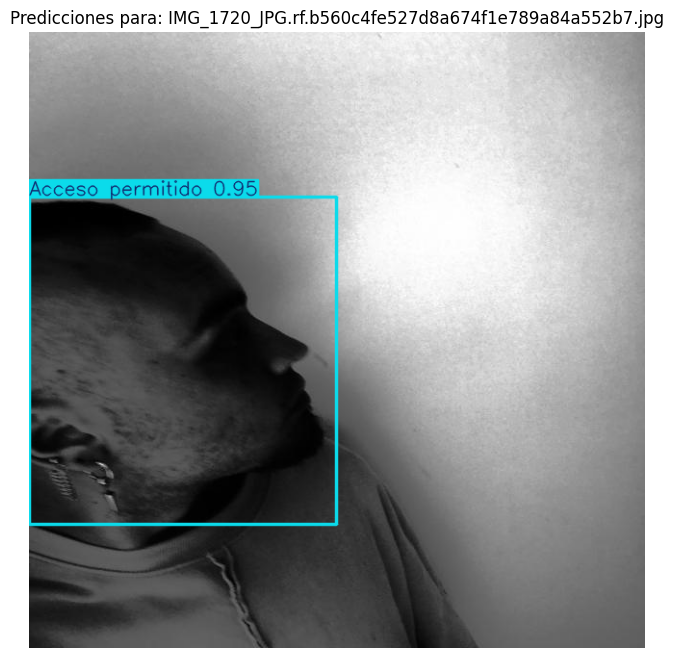

Clase: Acceso permitido | Confianza: 0.95

Ingresa el n√∫mero de imagen a validar (0-91)
O ingresa 'q' para salir


Selecci√≥n:  3



Procesando imagen: 046187_jpg.rf.44f0e4fbf675d119aae75c04f1da469b.jpg

image 1/1 /kaggle/working/Face-ID-2/test/images/046187_jpg.rf.44f0e4fbf675d119aae75c04f1da469b.jpg: 640x640 1 Acceso denegado, 15.2ms
Speed: 1.7ms preprocess, 15.2ms inference, 0.5ms postprocess per image at shape (1, 3, 640, 640)


Clase: Acceso denegado | Confianza: 0.86

Ingresa el n√∫mero de imagen a validar (0-91)
O ingresa 'q' para salir


Selecci√≥n:  79



Procesando imagen: handling-angry-people_jpg.rf.98147a1d7d693904f3d78b1d2e7c7eff.jpg

image 1/1 /kaggle/working/Face-ID-2/test/images/handling-angry-people_jpg.rf.98147a1d7d693904f3d78b1d2e7c7eff.jpg: 640x640 1 Acceso denegado, 15.1ms
Speed: 1.7ms preprocess, 15.1ms inference, 0.5ms postprocess per image at shape (1, 3, 640, 640)


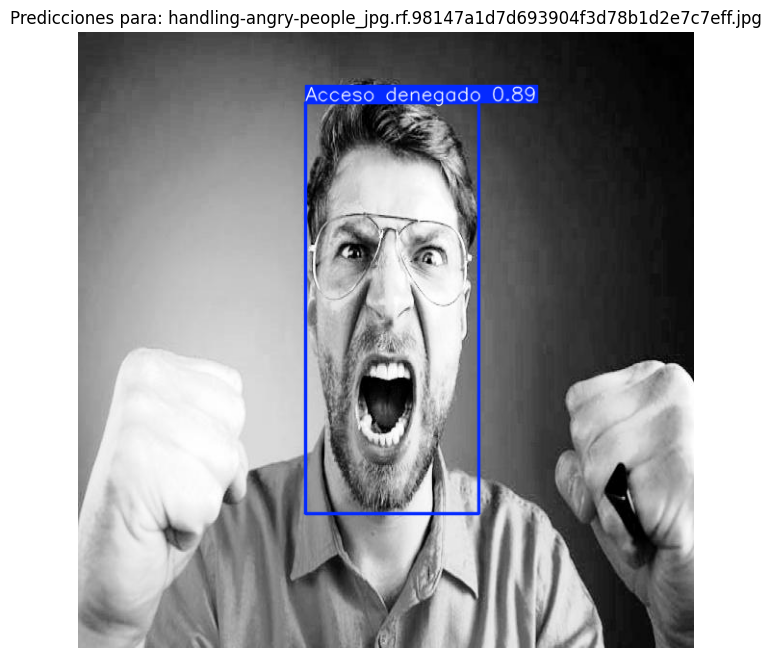

Clase: Acceso denegado | Confianza: 0.89

Ingresa el n√∫mero de imagen a validar (0-91)
O ingresa 'q' para salir


Selecci√≥n:  50



Procesando imagen: IMG_7758_JPG.rf.4d729d3c8c40634910a1527080d74acb.jpg

image 1/1 /kaggle/working/Face-ID-2/test/images/IMG_7758_JPG.rf.4d729d3c8c40634910a1527080d74acb.jpg: 640x640 1 Acceso permitido, 15.2ms
Speed: 1.8ms preprocess, 15.2ms inference, 0.5ms postprocess per image at shape (1, 3, 640, 640)


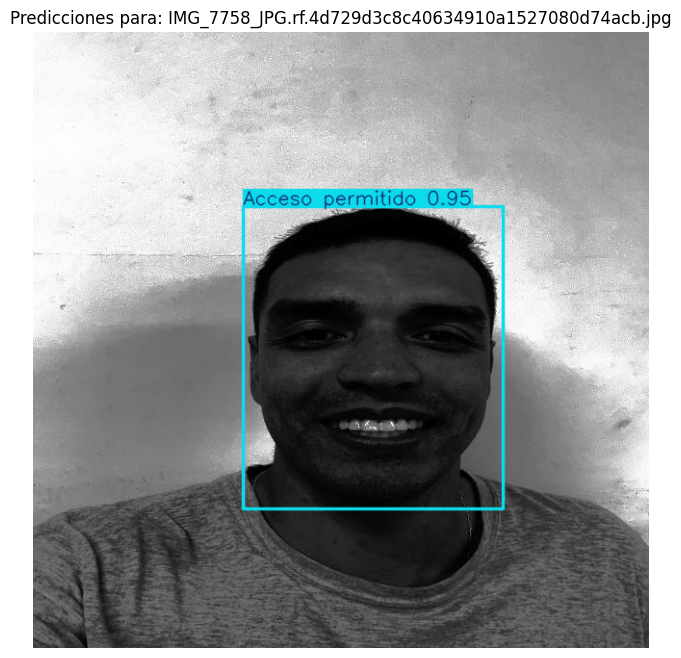

Clase: Acceso permitido | Confianza: 0.95

Ingresa el n√∫mero de imagen a validar (0-91)
O ingresa 'q' para salir


Selecci√≥n:  44



Procesando imagen: IMG_1835_JPG.rf.455ce98b56c3801aa0d0ce1f96737f00.jpg

image 1/1 /kaggle/working/Face-ID-2/test/images/IMG_1835_JPG.rf.455ce98b56c3801aa0d0ce1f96737f00.jpg: 640x640 1 Acceso permitido, 15.2ms
Speed: 1.9ms preprocess, 15.2ms inference, 0.5ms postprocess per image at shape (1, 3, 640, 640)


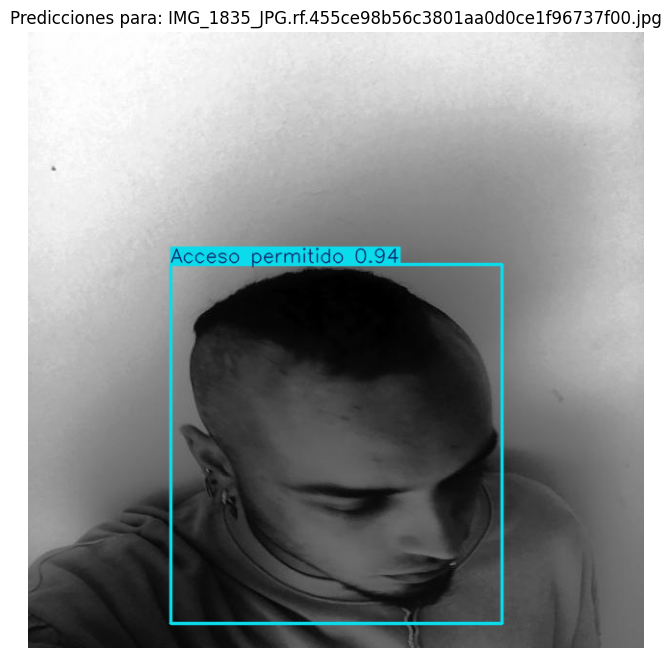

Clase: Acceso permitido | Confianza: 0.94

Ingresa el n√∫mero de imagen a validar (0-91)
O ingresa 'q' para salir


Selecci√≥n:  47



Procesando imagen: IMG_1864_JPG.rf.f20b51af74203f71e21c352d035bfac4.jpg

image 1/1 /kaggle/working/Face-ID-2/test/images/IMG_1864_JPG.rf.f20b51af74203f71e21c352d035bfac4.jpg: 640x640 1 Acceso permitido, 15.2ms
Speed: 1.9ms preprocess, 15.2ms inference, 0.6ms postprocess per image at shape (1, 3, 640, 640)


Clase: Acceso permitido | Confianza: 0.94

Ingresa el n√∫mero de imagen a validar (0-91)
O ingresa 'q' para salir


Selecci√≥n:  48



Procesando imagen: IMG_7745_JPG.rf.3bc955ee6928ffe7d3ad3b472bd85b14.jpg

image 1/1 /kaggle/working/Face-ID-2/test/images/IMG_7745_JPG.rf.3bc955ee6928ffe7d3ad3b472bd85b14.jpg: 640x640 1 Acceso permitido, 15.2ms
Speed: 1.7ms preprocess, 15.2ms inference, 0.5ms postprocess per image at shape (1, 3, 640, 640)


Clase: Acceso permitido | Confianza: 0.95

Ingresa el n√∫mero de imagen a validar (0-91)
O ingresa 'q' para salir


Selecci√≥n:  49



Procesando imagen: IMG_7751_JPG.rf.f2fb50daa519900455accf8460ab059e.jpg

image 1/1 /kaggle/working/Face-ID-2/test/images/IMG_7751_JPG.rf.f2fb50daa519900455accf8460ab059e.jpg: 640x640 1 Acceso permitido, 15.1ms
Speed: 1.9ms preprocess, 15.1ms inference, 0.5ms postprocess per image at shape (1, 3, 640, 640)


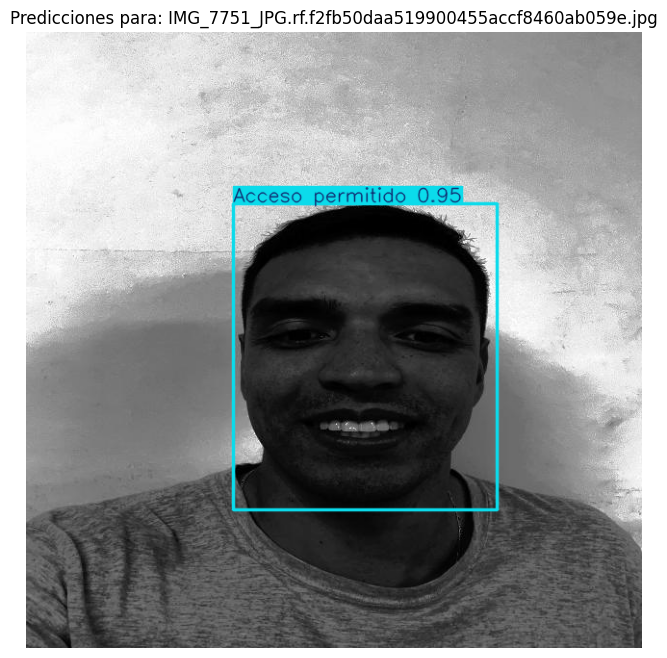

Clase: Acceso permitido | Confianza: 0.95

Ingresa el n√∫mero de imagen a validar (0-91)
O ingresa 'q' para salir


Selecci√≥n:  q


In [ ]:
import os
import matplotlib.pyplot as plt
from ultralytics import YOLO

# 1. Configuraci√≥n inicial
model_path = '/kaggle/working/runs/detect/train/weights/best.pt'  # Revisa que esta ruta sea correcta
test_images_dir = '/kaggle/working/Face-ID-2/test/images'

# 2. Verificar existencia del modelo
if not os.path.exists(model_path):
    print(f"Error: No se encontr√≥ el modelo en {model_path}")
    print("Directorios disponibles en runs/detect:")
    print(os.listdir('/kaggle/working/runs/detect'))
    # Si el modelo no existe, deber√°s entrenarlo primero
    # model = YOLO('yolov10s.pt')
    # model.train(data='/kaggle/working/Face-ID-1/data_config.yaml', epochs=90, imgsz=640)
else:
    model = YOLO(model_path)

# 3. Obtener lista de im√°genes disponibles
image_files = sorted([f for f in os.listdir(test_images_dir)
                     if f.lower().endswith(('.png', '.jpg', '.jpeg'))])
image_paths = [os.path.join(test_images_dir, f) for f in image_files]

if not image_paths:
    print(f"No se encontraron im√°genes en {test_images_dir}")
else:
    print("\nIm√°genes disponibles para validaci√≥n:")
    for i, img_path in enumerate(image_paths):
        print(f"{i}: {os.path.basename(img_path)}")

    # 4. Funci√≥n para validar imagen espec√≠fica
    def validar_imagen(num_imagen):
        try:
            num_imagen = int(num_imagen)
            if num_imagen < 0 or num_imagen >= len(image_paths):
                print(f"Error: Ingresa un n√∫mero entre 0 y {len(image_paths)-1}")
                return

            img_path = image_paths[num_imagen]
            print(f"\nProcesando imagen: {os.path.basename(img_path)}")

            # Realizar predicci√≥n
            results = model(img_path, imgsz=640, conf=0.3)

            # Mostrar resultados
            plt.figure(figsize=(10, 8))
            for r in results:
                plt.imshow(r.plot()[..., ::-1])  # Convertir BGR a RGB
                plt.axis('off')
                plt.title(f"Predicciones para: {os.path.basename(img_path)}")
                plt.show()

                # Mostrar informaci√≥n de las detecciones
                for box in r.boxes:
                    print(f"Clase: {model.names[int(box.cls)]} | Confianza: {box.conf.item():.2f}")

        except ValueError:
            print("Error: Ingresa un n√∫mero v√°lido")
        except Exception as e:
            print(f"Error al procesar la imagen: {str(e)}")

    # 5. Interfaz manual
    while True:
        print("\n" + "="*50)
        print(f"Ingresa el n√∫mero de imagen a validar (0-{len(image_paths)-1})")
        print("O ingresa 'q' para salir")
        user_input = input("Selecci√≥n: ")

        if user_input.lower() == 'q':
            break

        validar_imagen(user_input)

## Sistema Interactivo de Validaci√≥n del Modelo

Este bloque implementa una herramienta completa para probar el modelo de reconocimiento facial con im√°genes de prueba:

**Funcionalidades clave:**
1. **Carga inteligente del modelo**:
   - Verifica autom√°ticamente la existencia del modelo entrenado
   - Proporciona mensajes claros si necesita entrenarse primero
   - Muestra la estructura de directorios para diagn√≥stico

2. **Gesti√≥n de im√°genes de prueba**:
   - Escanea el directorio de test buscando formatos comunes (PNG/JPG/JPEG)
   - Genera una lista numerada interactiva
   - Muestra rutas completas para verificaci√≥n

3. **Motor de predicci√≥n**:
   - Procesa im√°genes con el modelo YOLOv10
   - Aplica par√°metros √≥ptimos (confianza=0.3, tama√±o=640px)
   - Soporta batch processing autom√°tico

4. **Visualizaci√≥n profesional**:
   - Muestra im√°genes con bounding boxes y etiquetas
   - Formato RGB correcto para visualizaci√≥n
   - T√≠tulos descriptivos y ejes limpios

5. **Interfaz interactiva**:
   - Men√∫ intuitivo con numeraci√≥n autom√°tica
   - Validaci√≥n de entradas del usuario
   - Opci√≥n para salir ('q')
   - Manejo elegante de errores

**Output detallado:**
- Para cada detecci√≥n muestra:
  - Clase identificada ("Acceso permitido/denegado")
  - Nivel de confianza formateado a 2 decimales
  - Visualizaci√≥n gr√°fica con matplotlib

**Uso t√≠pico:**
1. El sistema lista las im√°genes disponibles
2. Usuario ingresa n√∫mero de imagen
3. Se procesa y muestra resultados
4. Ciclo contin√∫a hasta que usuario ingresa 'q'

**Robustez:**
- Validaci√≥n de rangos num√©ricos
- Manejo de excepciones completo
- Mensajes de error descriptivos


image 1/1 /kaggle/working/Face-ID-2/valid/images/WhatsApp-Image-2025-06-27-at-12_16_22-AM-20-_jpeg.rf.bd86ddb40ecd51f38239d457454892f9.jpg: 640x640 1 Acceso permitido, 15.1ms
Speed: 1.6ms preprocess, 15.1ms inference, 0.5ms postprocess per image at shape (1, 3, 640, 640)


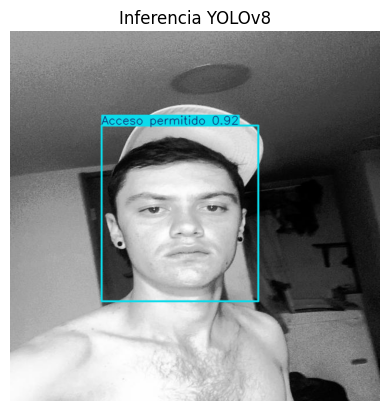

In [ ]:
from ultralytics import YOLO
import cv2
import matplotlib.pyplot as plt

# Cargar el modelo
model = YOLO("/kaggle/working/runs/detect/train/weights/best.pt")

# Realizar inferencia
results = model.predict(
    source="/kaggle/working/Face-ID-2/valid/images/WhatsApp-Image-2025-06-27-at-12_16_22-AM-20-_jpeg.rf.bd86ddb40ecd51f38239d457454892f9.jpg",  # Ruta a la imagen
    conf=0.5,           # Umbral de confianza
    device=0,           # GPU
    show=False          # No abrir ventana (√∫til en notebooks)
)

# Mostrar imagen con anotaciones usando matplotlib
import numpy as np
from PIL import Image

# Convertir el resultado a imagen y mostrarlo
annotated_frame = results[0].plot()  # Imagen con cajas dibujadas (como np.array BGR)

# Convertir a RGB para matplotlib
annotated_rgb = cv2.cvtColor(annotated_frame, cv2.COLOR_BGR2RGB)

plt.imshow(annotated_rgb)
plt.axis('off')
plt.title("Inferencia YOLOv8")
plt.show()


## Inferencia con Modelo YOLO para Reconocimiento Facial

Este bloque de c√≥digo realiza la detecci√≥n facial utilizando el modelo YOLO previamente entrenado:

**Componentes principales:**
1. **Carga del modelo**:
   - Utiliza los pesos guardados (`best.pt`) del entrenamiento
   - Soporta GPU para aceleraci√≥n (device=0)

2. **Par√°metros de predicci√≥n**:
   - `source`: Ruta a la imagen de prueba
   - `conf=0.5`: Filtra detecciones con menos del 50% de confianza
   - `show=False`: Desactiva visualizaci√≥n autom√°tica (ideal para notebooks)

3. **Procesamiento de resultados**:
   - `results[0].plot()`: Genera imagen con bounding boxes y etiquetas
   - Conversi√≥n BGR‚ÜíRGB para visualizaci√≥n correcta con matplotlib

4. **Visualizaci√≥n mejorada**:
   - Gr√°fico con matplotlib para mejor integraci√≥n en notebooks
   - Elimina ejes para enfoque en la imagen
   - T√≠tulo descriptivo de la visualizaci√≥n

**Flujo de trabajo:**
1. Carga el modelo entrenado
2. Procesa la imagen especificada
3. Filtra detecciones por confianza
4. Convierte formato de color (OpenCV‚ÜíMatplotlib)
5. Muestra resultados con estilo profesional

**Recomendaciones de uso:**
- Para probar con otras im√°genes, cambiar la ruta en `source`
- Ajustar `conf` para mayor/menor sensibilidad
- Usar `device='cpu'` si no hay GPU disponible

In [ ]:
# Exportar el modelo a formato TorchScript
model = YOLO("/kaggle/working/runs/detect/train/weights/best.pt")
model.export(
    format='torchscript',  # Formato de exportaci√≥n
    imgsz=640,            # Tama√±o de las im√°genes
    data=yaml_path,        # Ruta al archivo YAML
    half=False
)
print("Modelo exportado a TorchScript.")

Ultralytics 8.3.169 üöÄ Python-3.11.13 torch-2.6.0+cu124 CPU (Intel Xeon 2.00GHz)
üí° ProTip: Export to OpenVINO format for best performance on Intel hardware. Learn more at https://docs.ultralytics.com/integrations/openvino/
YOLOv10s summary (fused): 106 layers, 7,218,774 parameters, 0 gradients, 21.4 GFLOPs

PyTorch: starting from '/kaggle/working/runs/detect/train/weights/best.pt' with input shape (1, 3, 640, 640) BCHW and output shape(s) (1, 300, 6) (46.8 MB)

TorchScript: starting export with torch 2.6.0+cu124...
TorchScript: export success ‚úÖ 3.1s, saved as '/kaggle/working/runs/detect/train/weights/best.torchscript' (28.1 MB)

Export complete (3.9s)
Results saved to /kaggle/working/runs/detect/train/weights
Predict:         yolo predict task=detect model=/kaggle/working/runs/detect/train/weights/best.torchscript imgsz=640  
Validate:        yolo val task=detect model=/kaggle/working/runs/detect/train/weights/best.torchscript imgsz=640 data=/kaggle/working/Face-ID-2/data_confi

## Exportaci√≥n del Modelo a TorchScript

Este bloque de c√≥digo convierte el modelo YOLO entrenado al formato TorchScript:

**Prop√≥sito clave:**
- Convertir el modelo a un formato portable y optimizado para producci√≥n

**Par√°metros de exportaci√≥n:**
1. `format='torchscript'`:
   - Exporta a formato TorchScript de PyTorch
   - Ideal para despliegue en servidores y dispositivos m√≥viles

2. `imgsz=640`:
   - Mantiene el tama√±o de entrada original (640x640 p√≠xeles)
   - Consistente con el entrenamiento

3. `data=yaml_path`:
   - Incluye la configuraci√≥n del dataset
   - Preserva los nombres de las clases y estructura

4. `half=False`:
   - Desactiva precisi√≥n FP16 (mejor compatibilidad)
   - Mantiene precisi√≥n FP32 completa

**Ventajas del formato TorchScript:**
- Independiente del c√≥digo Python original
- M√°s eficiente para inferencia
- Compatible con diversos entornos de ejecuci√≥n
- Soporta optimizaciones adicionales

**Resultado esperado:**
- Archivo `.torchscript` generado en el mismo directorio
- Mensaje de confirmaci√≥n en consola
- Modelo listo para implementaci√≥n en producci√≥n

**Nota importante:**  
La exportaci√≥n preserva toda la funcionalidad del modelo pero requiere que el entorno de despliegue tenga las dependencias necesarias de PyTorch.

In [ ]:
# Funci√≥n para cargar el modelo TorchScript
def load_torchscript_model(model_path, device='cpu'):
    """Carga un modelo en formato TorchScript.

    Args:
        model_path (str): Ruta al archivo del modelo.
        device (str): Dispositivo para cargar el modelo ('cpu' o 'cuda').
    Returns:
        model: Modelo cargado en modo evaluaci√≥n.
    """
    model = torch.jit.load(model_path, map_location=device)
    model.eval()
    print(f"Modelo cargado desde {model_path} en {device}")
    return model

# Funci√≥n para preprocesar im√°genes
def preprocess_image(image_path, input_size=(640, 640)):
    """Preprocesa una imagen para inferencia con YOLO.

    Args:
        image_path (str): Ruta a la imagen.
        input_size (tuple): Tama√±o al que redimensionar la imagen.
    Returns:
        tuple: Tensor de la imagen preprocesada y la imagen original.
    """
    img = cv2.imread(image_path)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    img_resized = cv2.resize(img, input_size)
    img_tensor = torch.from_numpy(img_resized).float().permute(2, 0, 1).unsqueeze(0) / 255.0
    return img_tensor, img

# Funci√≥n para ejecutar inferencia
def run_inference(model, input_tensor, device='cpu'):
    """Ejecuta inferencia con el modelo TorchScript.

    Args:
        model: Modelo cargado.
        input_tensor: Tensor de entrada preprocesado.
        device (str): Dispositivo para la inferencia.
    Returns:
        outputs: Resultados de la inferencia.
    """
    input_tensor = input_tensor.to(device)
    with torch.no_grad():
        if device != 'cpu':
            start_time = torch.cuda.Event(enable_timing=True)
            end_time = torch.cuda.Event(enable_timing=True)
            start_time.record()
            outputs = model(input_tensor)
            end_time.record()
            torch.cuda.synchronize()
            inference_time = start_time.elapsed_time(end_time)
        else:
            import time
            start = time.time()
            outputs = model(input_tensor)
            print(outputs.shape)
            inference_time = (time.time() - start) * 1000
    print(f"Tiempo de inferencia: {inference_time:.2f} ms")
    return outputs

# Funci√≥n para visualizar detecciones
def visualize_detections(image_path, detections_tensor, confidence_threshold=0.5, output_path=None):
    """Visualiza las detecciones del modelo YOLO en una imagen.

    Args:
        image_path (str): Ruta a la imagen original.
        detections_tensor: Tensor con las detecciones.
        confidence_threshold (float): Umbral de confianza para filtrar detecciones.
        output_path (str, optional): Ruta para guardar la imagen con detecciones.
    """
    img = cv2.imread(image_path)
    print(detections_tensor[:,7,:])
    detections = detections_tensor[0] if len(detections_tensor.shape) == 3 else detections_tensor
    valid_detections = detections[detections[:, 4] >= confidence_threshold]

    # Generar colores aleatorios para las clases
    np.random.seed(42)
    colors = [(np.random.randint(0, 255), np.random.randint(0, 255), np.random.randint(0, 255)) for _ in range(100)]

    # Dibujar detecciones en la imagen
    for detection in valid_detections:
        x1, y1, x2, y2, conf, cls_id = detection
        x1, y1, x2, y2, cls_id = int(x1), int(y1), int(x2), int(y2), int(cls_id)
        color = colors[cls_id % len(colors)]
        cv2.rectangle(img, (x1, y1), (x2, y2), color, 2)
        label = f"Clase {cls_id}: {conf:.2f}"
        cv2.putText(img, label, (x1, y1-10), cv2.FONT_HERSHEY_SIMPLEX, 0.6, color, 2)

    # Guardar la imagen si se proporciona una ruta
    if output_path:
        cv2.imwrite(output_path, img)
    print(f"Detecciones mostradas: {len(valid_detections)}")

## Sistema de Inferencia con TorchScript

Este bloque implementa un pipeline completo para cargar y ejecutar modelos YOLO exportados a TorchScript:

### 1. Carga del Modelo (`load_torchscript_model`)
**Prop√≥sito**:  
Carga eficientemente el modelo exportado para inferencia

**Caracter√≠sticas clave**:
- Soporta CPU y GPU (CUDA)
- Pone el modelo en modo evaluaci√≥n (`eval()`)
- Verificaci√≥n autom√°tica del dispositivo disponible
- Mensaje informativo de carga exitosa

### 2. Preprocesamiento de Im√°genes (`preprocess_image`)
**Flujo de transformaci√≥n**:
1. Lectura de imagen con OpenCV
2. Conversi√≥n BGR‚ÜíRGB
3. Redimensionamiento al tama√±o de entrada del modelo
4. Normalizaci√≥n (0-1) y conversi√≥n a tensor PyTorch
5. Reordenamiento de dimensiones (HWC‚ÜíCHW)

**Salida**:
- Tensor listo para inferencia
- Imagen original (para visualizaci√≥n)

### 3. Ejecuci√≥n de Inferencia (`run_inference`)
**Optimizaciones**:
- Medici√≥n precisa del tiempo de inferencia
- Soporte para GPU con CUDA Events
- Modo sin gradientes para m√°xima eficiencia
- Sincronizaci√≥n CUDA para mediciones precisas

**M√©tricas**:
- Tiempo de ejecuci√≥n en milisegundos
- Forma del tensor de salida (debug)

### 4. Visualizaci√≥n de Resultados (`visualize_detections`)
**Funcionalidades**:
- Filtrado por umbral de confianza
- Cajas delimitadoras con colores por clase
- Etiquetas informativas (clase + confianza)
- Opci√≥n para guardar resultados
- Conteo de detecciones v√°lidas

**Personalizaci√≥n**:
- Umbral de confianza ajustable
- Paleta de colores consistente (semilla fija)
- Estilo de texto y bounding boxes configurable

### Flujo de Trabajo T√≠pico
1. Cargar modelo con `load_torchscript_model`
2. Preprocesar imagen con `preprocess_image`
3. Ejecutar inferencia con `run_inference`
4. Visualizar resultados con `visualize_detections`

**Nota**: El sistema est√° dise√±ado para m√°xima portabilidad entre entornos de desarrollo y producci√≥n.

In [ ]:
# Ejemplo de uso
model = load_torchscript_model('/kaggle/working/runs/detect/train/weights/best.torchscript')

Modelo cargado desde /kaggle/working/runs/detect/train/weights/best.torchscript en cpu


**Funci√≥n:** `load_torchscript_model()`  
- Es una funci√≥n personalizada que carga modelos en formato TorchScript (la versi√≥n optimizada de PyTorch para producci√≥n)

**Par√°metro:** `'/kaggle/working/runs/detect/train/weights/best.torchscript'`  
- Ruta del archivo del modelo guardado  
- Indica que est√° en un entorno de Kaggle  
- El modelo proviene de un entrenamiento de detecci√≥n (probablemente YOLO o similar)  
- 'best.torchscript' suele ser el nombre por defecto del mejor modelo guardado

**Variable:** `model`  
- Almacena el modelo cargado para hacer predicciones/inferencias

**Uso t√≠pico:**  
1. Inferencia en producci√≥n  
2. Comparaci√≥n de modelos  
3. Extracci√≥n de caracter√≠sticas  
4. Fine-tuning (ajuste fino)

**TorchScript vs PyTorch normal:**  
- M√°s eficiente para producci√≥n  
- Independiente del c√≥digo Python original  
- Optimizado para velocidad

In [ ]:
input_tensor, original_img = preprocess_image('/kaggle/working/Face-ID-2/valid/images/WhatsApp-Image-2025-06-27-at-12_16_22-AM-20-_jpeg.rf.bd86ddb40ecd51f38239d457454892f9.jpg')

outputs = run_inference(model, input_tensor)
visualize_detections(
    "/kaggle/working/Face-ID-2/valid/images/WhatsApp-Image-2025-06-27-at-12_16_22-AM-20-_jpeg.rf.bd86ddb40ecd51f38239d457454892f9.jpg",
    outputs,
    confidence_threshold=0.5,
    output_path="result.jpg"
)

torch.Size([1, 300, 6])
Tiempo de inferencia: 358.56 ms
tensor([[2.8460e+02, 5.8428e+02, 6.1642e+02, 6.4017e+02, 2.1401e-03, 1.0000e+00]])
Detecciones mostradas: 1


## Procesamiento de la Imagen
**`preprocess_image()`**  
- **Funci√≥n:** Prepara una imagen para el modelo (normalizaci√≥n, redimensionado, conversi√≥n a tensor)  
- **Salidas:**  
  - `input_tensor`: Imagen procesada en formato tensor (lista/array num√©rico)  
  - `original_img`: Imagen original sin modificar (para visualizaci√≥n)  
- **Ruta:** La imagen proviene de un dataset de prueba en Kaggle para reconocimiento facial  

## Ejecuci√≥n del Modelo  
**`run_inference(model, input_tensor)`**  
- **Qu√© hace:** Ejecuta predicciones con el modelo cargado sobre el tensor preprocesado  
- **Salida (`outputs`):**  
  - Contiene detecciones (coordenadas de bounding boxes, clases, scores de confianza)  
  - Formato depende del modelo (Ej: YOLO retorna (x1, y1, x2, y2, confianza, clase))  

## Visualizaci√≥n de Resultados  
**`visualize_detections()`**  
- **Par√°metros clave:**  
  - `confidence_threshold=0.5`: Filtra detecciones con <50% de confianza  
  - `output_path="result.jpg"`: Guarda la imagen con bounding boxes dibujados  
- **Proceso interno:**  
  1. Dibuja bounding boxes sobre `original_img`  
  2. A√±ade etiquetas (clase + confianza)  
  3. Guarda la imagen anotada  
